In [ ]:
%%bash
rm -r /content/sample_data/

# The very first step is the basic manipulation of the manual check csv file:

## Change the column name at first:

In [ ]:
import pandas as pd
df = pd.read_csv("/content/manual_check_new_01_02.csv")
df.rename(columns={'If there are multiple GSE IDs in "GSE_accessions_found" cells, which accession ID is the primary one?': 'primary_GSE_in_both'}, inplace=True)
df.rename(columns={'GSE ID belongs to Primary accession numbers; But shared only in the Publication': 'primary_GSE_only_in_pub'}, inplace=True)
df.rename(columns={'GSE IDs posted in the publication to make the publication to be Primary analysis or Secondary analysis?':'P_or_S'},inplace=True)

In [ ]:
df.dropna(axis=1, how='all', inplace=True)
df

,preprint_doi,publication_doi,accession_found,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub
0,10.1101/2020.02.16.20023663,10.1002/cnr2.1423,"GSE33113,GSE31595",No,NaN,Secondary analysis,NaN
1,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary analysis,NaN
2,10.1101/2020.03.31.20047621,10.1002/jcp.29802,"GSE132771,GSE109816,GSE139516,GSE136848",No,NaN,Secondary analysis,NaN
3,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary analysis,NaN
4,10.1101/2020.04.09.033472,10.1002/trc2.12078,"GSE13850,GSE2208,GSE23746,GSE19151,GSE7638,GSE...",No,NaN,Secondary analysis,NaN
...,...,...,...,...,...,...,...
914,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025
915,10.1101/727362,10.1261/rna.075929.120,GSE107011,No,NaN,Secondary,NaN
916,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297
917,10.1101/789891,10.1093/nargab/lqaa008,GSE100467,No,NaN,Primary,GSE138318


## Let's convert the "Primary analysis" and "Secondary analysis" to the "Primary" and "Secondary" at first:

In [ ]:
df.loc[df['P_or_S']=='Secondary analysis','P_or_S']='Secondary'
df.loc[df['P_or_S']=='Primary analysis','P_or_S']='Primary'
df.head(5)

,preprint_doi,publication_doi,accession_found,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub
0,10.1101/2020.02.16.20023663,10.1002/cnr2.1423,"GSE33113,GSE31595",No,NaN,Secondary,NaN
1,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,NaN
2,10.1101/2020.03.31.20047621,10.1002/jcp.29802,"GSE132771,GSE109816,GSE139516,GSE136848",No,NaN,Secondary,NaN
3,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,NaN
4,10.1101/2020.04.09.033472,10.1002/trc2.12078,"GSE13850,GSE2208,GSE23746,GSE19151,GSE7638,GSE...",No,NaN,Secondary,NaN


## Add Markers to mark whether the study mentioned the GSE ID in both preprints and publications and only in the publications:

In [ ]:
df.loc[(df['Primary accessions?'] == 'Yes') & (df['P_or_S'] == 'Primary'), 'Marker'] = '1'
df.loc[(df['Primary accessions?'] == 'No') & (df['P_or_S'] == 'Primary'), 'Marker'] = '2'
df.loc[(df['Primary accessions?'] == 'No') & (df['P_or_S'] == 'Secondary'), 'Marker'] = '3'
df['Marker'] = df['Marker'].astype(str).str.strip()

In [ ]:
secondary_analysis = df[df['Marker'] == '3']

primary_analysis = df[(df['Marker'] == '1') | (df['Marker'] == '2')]

In [ ]:
count = df[df['Marker'] == '3'].shape[0]
print(count)

94


In [ ]:
print(len(secondary_analysis))
print(len(primary_analysis))

94
814


In [ ]:
secondary_analysis.to_csv('/content/final_analysis_of_920_secondary.csv')

In [ ]:
primary_analysis.to_csv('/content/final_analysis_of_920_primary.csv')

## Let's expand those GSE IDs that were in one cell into multiple rows:

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/final_analysis_of_920_primary.csv')
# Splitting the comma-separated string into a list
df1['primary_GSE_only_in_pub'] = df1['primary_GSE_only_in_pub'].astype(str).str.split(',')
# Exploding the list into separate rows
df1 = df1.explode('primary_GSE_only_in_pub')
df1

,Unnamed: 0,preprint_doi,publication_doi,accession_found,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker
0,1,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,nan,1
1,3,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,nan,1
2,5,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,nan,1
3,6,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,NaN,Primary,GSE55600,2
4,9,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1
...,...,...,...,...,...,...,...,...,...
809,912,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,NaN,Primary,GSE130231,2
810,913,10.1101/647388,10.1084/jem.20182009,GSE53646,No,NaN,Primary,GSE116698,2
811,914,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025,2
812,916,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297,2


In [ ]:
df1.drop_duplicates(subset=['preprint_doi','publication_doi','accession_found','primary_GSE_only_in_pub'],keep='first')

,Unnamed: 0,preprint_doi,publication_doi,accession_found,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker
0,1,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,nan,1
1,3,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,nan,1
2,5,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,nan,1
3,6,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,NaN,Primary,GSE55600,2
4,9,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1
...,...,...,...,...,...,...,...,...,...
809,912,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,NaN,Primary,GSE130231,2
810,913,10.1101/647388,10.1084/jem.20182009,GSE53646,No,NaN,Primary,GSE116698,2
811,914,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025,2
812,916,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297,2


In [ ]:
print(df1.columns)

Index(['Unnamed: 0', 'preprint_doi', 'publication_doi', 'accession_found',
       'Primary accessions?', 'primary_GSE_in_both', 'P_or_S',
       'primary_GSE_only_in_pub', 'Marker'],
      dtype='object')


In [ ]:
print(df1['primary_GSE_only_in_pub'].isna().sum())

0


## Let's remove those rows which do not have contain string "GSE" in the primary analysis:

In [ ]:
df1['primary_GSE_only_in_pub'] = df1['primary_GSE_only_in_pub'].replace('nan','N/A')
df1

,Unnamed: 0,preprint_doi,publication_doi,accession_found,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker
0,1,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,N/A,1
1,3,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,N/A,1
2,5,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,N/A,1
3,6,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,NaN,Primary,GSE55600,2
4,9,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1
...,...,...,...,...,...,...,...,...,...
809,912,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,NaN,Primary,GSE130231,2
810,913,10.1101/647388,10.1084/jem.20182009,GSE53646,No,NaN,Primary,GSE116698,2
811,914,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025,2
812,916,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297,2


In [ ]:
gse_df = df1[df1['primary_GSE_only_in_pub'].str.contains("GSE|N/A")]
filtered_df = df1[df1['primary_GSE_only_in_pub'].str.contains("PRJNA|SRP|PRJEB|ERA")]
print(len(gse_df))
print(len(filtered_df))

879
32


In [ ]:
gse_df.to_csv("/content/GSE_IDs_879.csv")

In [ ]:
filtered_df.to_csv("/content/SRA_IDs_32.csv")

## Rename the column "accession_found" at first:

In [ ]:
import pandas as pd
df_gse = pd.read_csv('/content/GSE_IDs_879.csv')
df_gse.rename(columns={'accession_found': 'accession_IDs_after_filtering'}, inplace=True)

# Now, let's copy the "GSE_accession_found" column from the "6834_simplified_new.csv".


## The "GSE_accession_found" column in the "6834_simplified_new.csv" represents for GSE IDs originally extracted from the text of the preprint, before identifying "mentioned in the both preprint and publication" or "mentioned only in the publication"

In [ ]:
df_6834 = pd.read_csv('/content/6834_new.csv')
df_gse['publication_doi'] = df_gse['publication_doi'].astype(str)

df_6834['published_doi1'] = df_6834['published_doi1'].astype(str)
# Merge the dataframes based on the 'published_doi' values
merged_df = pd.merge(df_gse, df_6834, left_on='publication_doi', right_on='published_doi1', how='left')
# Rename the column
merged_df.rename(columns={'GSE_accessions_found': 'GSE_ID_before_filtering'}, inplace=True)
# Drop the duplicated column
merged_df.drop(columns=['published_doi1','preprint_doi1'],inplace=True)

## Fill in this study: "10.1101/2020.02.19.956565" manually

In [ ]:
condition = merged_df['preprint_doi'] == '10.1101/2020.02.19.956565'
merged_df.loc[condition,'GSE_ID_before_filtering'] = 'GSE65785, GSE61475, GSE81458, GSE72657, GSE81458, GSE65785, GSE72657, GSE85273, GSE56000, GSE67974, GSE148726'

In [ ]:
merged_df

,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,Unnamed: 2,GSE_ID_before_filtering
0,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,NaN,1,NaN,GSE161386
1,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,NaN,1,NaN,"GSE32358, GSE32538, GSE53845, GSE53845, GSE156..."
2,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,NaN,1,NaN,"GSE137959, GSE137845, GSE134470, GSE128195"
3,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,NaN,Primary,GSE55600,2,NaN,"GSE20851, GSE30765, GSE39866, GSE39866, GSE452..."
4,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1,NaN,"GSE108160, GSE108107"
...,...,...,...,...,...,...,...,...,...,...
878,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,NaN,Primary,GSE130231,2,NaN,"GSE70116, GSE130231"
879,10.1101/647388,10.1084/jem.20182009,GSE53646,No,NaN,Primary,GSE116698,2,NaN,"GSE116698, GSE53646"
880,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025,2,NaN,"GSE97575, GSE40291"
881,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297,2,NaN,GSE86222


In [ ]:
merged_df = merged_df.drop(['Unnamed: 2'], axis=1)

In [ ]:
merged_df.to_csv('/content/manual_check_with_GSE_IDs_before_filtering.csv')

## Now, let's figure out which GSE IDs from the original dataset that not exist in these GSE IDs that being check(do not overlap with the dataset where GSE IDs mentioned in the text of publication)

In [ ]:
import pandas as pd

df_new = pd.read_csv('/content/manual_check_with_GSE_IDs_before_filtering.csv')

df_new['accession_IDs_after_filtering'] = df_new['accession_IDs_after_filtering'].astype(str)
df_new['GSE_ID_before_filtering'] = df_new['GSE_ID_before_filtering'].astype(str)

def find_filtered_out_ids(row):
    # Split the 'before filtering' IDs and remove any extra spaces
    ids_before = set([x.strip() for x in row['GSE_ID_before_filtering'].split(',')])
    # IDs after filtering
    id_after = set([x.strip() for x in row['accession_IDs_after_filtering'].split(',')])
    # Find the difference
    filtered_out = ids_before - id_after
    return ', '.join(filtered_out)

df_new['filtered_out_GSE_IDs'] = df_new.apply(find_filtered_out_ids, axis=1)
df_new

,Unnamed: 0,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,GSE_ID_before_filtering,filtered_out_GSE_IDs
0,0,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,NaN,1,GSE161386,
1,1,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,NaN,1,"GSE32358, GSE32538, GSE53845, GSE53845, GSE156...",
2,2,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,NaN,1,"GSE137959, GSE137845, GSE134470, GSE128195",
3,3,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,NaN,Primary,GSE55600,2,"GSE20851, GSE30765, GSE39866, GSE39866, GSE452...",GSE55600
4,4,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1,"GSE108160, GSE108107",GSE108160
...,...,...,...,...,...,...,...,...,...,...,...
878,878,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,NaN,Primary,GSE130231,2,"GSE70116, GSE130231",GSE130231
879,879,10.1101/647388,10.1084/jem.20182009,GSE53646,No,NaN,Primary,GSE116698,2,"GSE116698, GSE53646",GSE116698
880,880,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,NaN,Primary,GSE138025,2,"GSE97575, GSE40291",GSE40291
881,881,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,NaN,Primary,GSE137297,2,GSE86222,


## Now, let's fill in those cells with the string-"None":

In [ ]:
df_new.applymap(type)

,Unnamed: 0,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,GSE_ID_before_filtering,filtered_out_GSE_IDs
0,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'str'>,<class 'str'>
1,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'str'>,<class 'str'>
2,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'int'>,<class 'str'>,<class 'str'>
3,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>
4,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>
...,...,...,...,...,...,...,...,...,...,...,...
878,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>
879,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>
880,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>
881,<class 'int'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'str'>,<class 'float'>,<class 'str'>,<class 'str'>,<class 'int'>,<class 'str'>,<class 'str'>


In [ ]:
df_new['filtered_out_GSE_IDs'] = df_new['filtered_out_GSE_IDs'].replace('', 'None')

In [ ]:
df_new.to_csv("/content/which_are_filtered.csv")

## Now, let's figure out if the GSE IDs that were manually found in the publication to be primary accession IDs could be found in the "filtered out GSE IDs" column. If yes, meaning that these IDs are mentioned in both preprints and publications

In [ ]:
import pandas as pd
df_new = pd.read_csv("/content/which_are_filtered.csv")

df_new['primary_GSE_only_in_pub'] = df_new['primary_GSE_only_in_pub'].fillna("N/A")
df_new['primary_GSE_in_both'] = df_new['primary_GSE_in_both'].fillna("N/A")

df_new['primary_GSE_only_in_pub'] = df_new['primary_GSE_only_in_pub'].str.replace(' ','')
df_new['filtered_out_GSE_IDs'] = df_new['filtered_out_GSE_IDs'].str.replace(' ','')

In [ ]:
df_new.loc[df_new['primary_GSE_only_in_pub']=='N/A','GSE_only_in_pub_in_filtered_section']='Skip'
df_new.loc[df_new['filtered_out_GSE_IDs']=='None','GSE_only_in_pub_in_filtered_section']='Skip'

In [ ]:
df_new

,Unnamed: 0.1,Unnamed: 0,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,GSE_ID_before_filtering,filtered_out_GSE_IDs,GSE_only_in_pub_in_filtered_section
0,0,0,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,N/A,1,GSE161386,None,Skip
1,1,1,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,N/A,1,"GSE32358, GSE32538, GSE53845, GSE53845, GSE156...",None,Skip
2,2,2,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,N/A,1,"GSE137959, GSE137845, GSE134470, GSE128195",None,Skip
3,3,3,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,N/A,Primary,GSE55600,2,"GSE20851, GSE30765, GSE39866, GSE39866, GSE452...",GSE55600,NaN
4,4,4,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1,"GSE108160, GSE108107",GSE108160,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,N/A,Primary,GSE130231,2,"GSE70116, GSE130231",GSE130231,NaN
879,879,879,10.1101/647388,10.1084/jem.20182009,GSE53646,No,N/A,Primary,GSE116698,2,"GSE116698, GSE53646",GSE116698,NaN
880,880,880,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,N/A,Primary,GSE138025,2,"GSE97575, GSE40291",GSE40291,NaN
881,881,881,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,N/A,Primary,GSE137297,2,GSE86222,None,Skip


In [ ]:
# Splitting the IDs and creating a set
gse_ids = set(df_new['filtered_out_GSE_IDs'].str.split(',').explode())

def echo_test(row):
    if row['primary_GSE_only_in_pub'] != 'N/A' and row['filtered_out_GSE_IDs'] != 'None':
        if row['primary_GSE_only_in_pub'] in gse_ids:
            return 'Found!'
        else:
            return 'Not Found'
    else:
        return 'Skip'
# Apply the function to the entire DataFrame
df_new['GSE_only_in_pub_in_filtered_section'] = df_new.apply(echo_test, axis=1)
df_new

,Unnamed: 0.1,Unnamed: 0,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,GSE_ID_before_filtering,filtered_out_GSE_IDs,GSE_only_in_pub_in_filtered_section
0,0,0,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386,Yes,GSE161386,Primary,N/A,1,GSE161386,None,Skip
1,1,1,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE32358,GSE32538,GSE53845,GSE158624,GSE156572",Yes,"GSE158624,GSE156572",Primary,N/A,1,"GSE32358, GSE32538, GSE53845, GSE53845, GSE156...",None,Skip
2,2,2,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195",Yes,"GSE137959,GSE137845,GSE134470,GSE128195",Primary,N/A,1,"GSE137959, GSE137845, GSE134470, GSE128195",None,Skip
3,3,3,10.1101/459289,10.1007/s13238-019-0650-z,"GSE20851,GSE30765,GSE39866,GSE45282",No,N/A,Primary,GSE55600,2,"GSE20851, GSE30765, GSE39866, GSE39866, GSE452...",GSE55600,Found!
4,4,4,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,Yes,GSE108107,Primary,GSE108160,1,"GSE108160, GSE108107",GSE108160,Found!
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,878,878,10.1101/619080,10.1038/s41467-019-11800-x,GSE70116,No,N/A,Primary,GSE130231,2,"GSE70116, GSE130231",GSE130231,Found!
879,879,879,10.1101/647388,10.1084/jem.20182009,GSE53646,No,N/A,Primary,GSE116698,2,"GSE116698, GSE53646",GSE116698,Found!
880,880,880,10.1101/699173,10.1073/pnas.2016950118,GSE97575,No,N/A,Primary,GSE138025,2,"GSE97575, GSE40291",GSE40291,Not Found
881,881,881,10.1101/761387,10.1093/nar/gkaa147,GSE86222,No,N/A,Primary,GSE137297,2,GSE86222,None,Skip


In [ ]:
df_new.to_csv("/content/mentioned_in_both_wrongly_identified_to_be_only_in_pub.csv")

## Let's check if there is any wrong identifiers(Yes/No):

In [ ]:
import pandas as pd
df = pd.read_csv("/content/mentioned_in_both_wrongly_identified_to_be_only_in_pub.csv")
df_marking_errors = df.loc[((df["Primary accessions?"]=='Yes') & (df["primary_GSE_in_both"].isna()))|((df["Primary accessions?"]=='No') & (df["primary_GSE_in_both"].notna()))]
df_marking_errors

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,preprint_doi,publication_doi,accession_IDs_after_filtering,Primary accessions?,primary_GSE_in_both,P_or_S,primary_GSE_only_in_pub,Marker,GSE_ID_before_filtering,filtered_out_GSE_IDs,GSE_only_in_pub_in_filtered_section
25,25,25,25,10.1101/2020.12.20.423710,10.1016/j.celrep.2021.109597,GSE120703,Yes,NaN,Primary,GSE178179,1,GSE120703,None,Skip
284,284,284,284,10.1101/443770,10.1038/s41556-020-00619-0,"GSE87076,GSE57584,GSE65013,GSE32606,GSE49292",No,GSE87076,Primary,GSE128987,2,"GSE87076, GSE87076, GSE57584, GSE66115, GSE694...","GSE69453,GSE69429,GSE66115",Not Found
460,460,460,460,10.1101/033001,10.1101/gr.202432.115,GSE30198,Yes,NaN,Primary,NaN,1,"GSE30198, GSE30198",None,Skip
855,855,855,855,10.1101/2020.07.30.20165241,10.1038/s41467-020-20139-7,GSE150316,Yes,NaN,Primary,GSE159788,1,"GSE150316, GSE150316, GSE150316, GSE150316, GS...",None,Skip


## Let's modify them here:

In [ ]:
# Row 25:
condition = df['preprint_doi'] == '10.1101/2020.12.20.423710'
df.loc[condition,'primary_GSE_in_both'] = 'GSE120703'

In [ ]:
# Row 284:
condition = df['preprint_doi'] == '10.1101/443770'
df.loc[condition,'Primary accessions?'] = 'Yes'
df.loc[condition,'Marker'] = '1'

In [ ]:
# Row 855:
condition = df['preprint_doi'] == '10.1101/2020.07.30.20165241'
df.loc[condition,'primary_GSE_in_both'] = 'GSE150316'

The primary accession ID the found in the publication(row 3; df_marking_errors) is SRP065825; this row was manually added to the csv file "SRA_IDs_32.csv". Now, let's delete this row from the df("/content/mentioned_in_both_wrongly_identified_to_be_only_in_pub.csv"):

In [ ]:
condition = df['preprint_doi'] == '10.1101/033001'
# Get the index of rows that match the condition
indices_to_drop = df[condition].index
# Drop these rows
df = df.drop(indices_to_drop)

Now, this is the final version of manual check result before GSE IDs that were mentioned in both/mentioned only in publication being taken apart.

In [ ]:
df = df.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0'], axis=1)

In [ ]:
df.to_csv("/content/finaly_datasheet_of_manual_check_GSE_IDs.csv")

# The following step is to separate GSE IDs that were mentioned in both preprints and publications or merely mentioned in publications:

This google sheet here provides a clear view of the csv file "/content/finaly_datasheet_of_manual_check_GSE_IDs.csv"; and then the following figure discribes conditions for distinguishing GSE IDs belonging to "mentioned in both preprint and publication" and "mentioned only in publications":
https://docs.google.com/spreadsheets/d/1wmXpIzfeOAZojqMn14DT_kyjN_VgRokYfOqWTIFBLTo/edit?usp=sharing


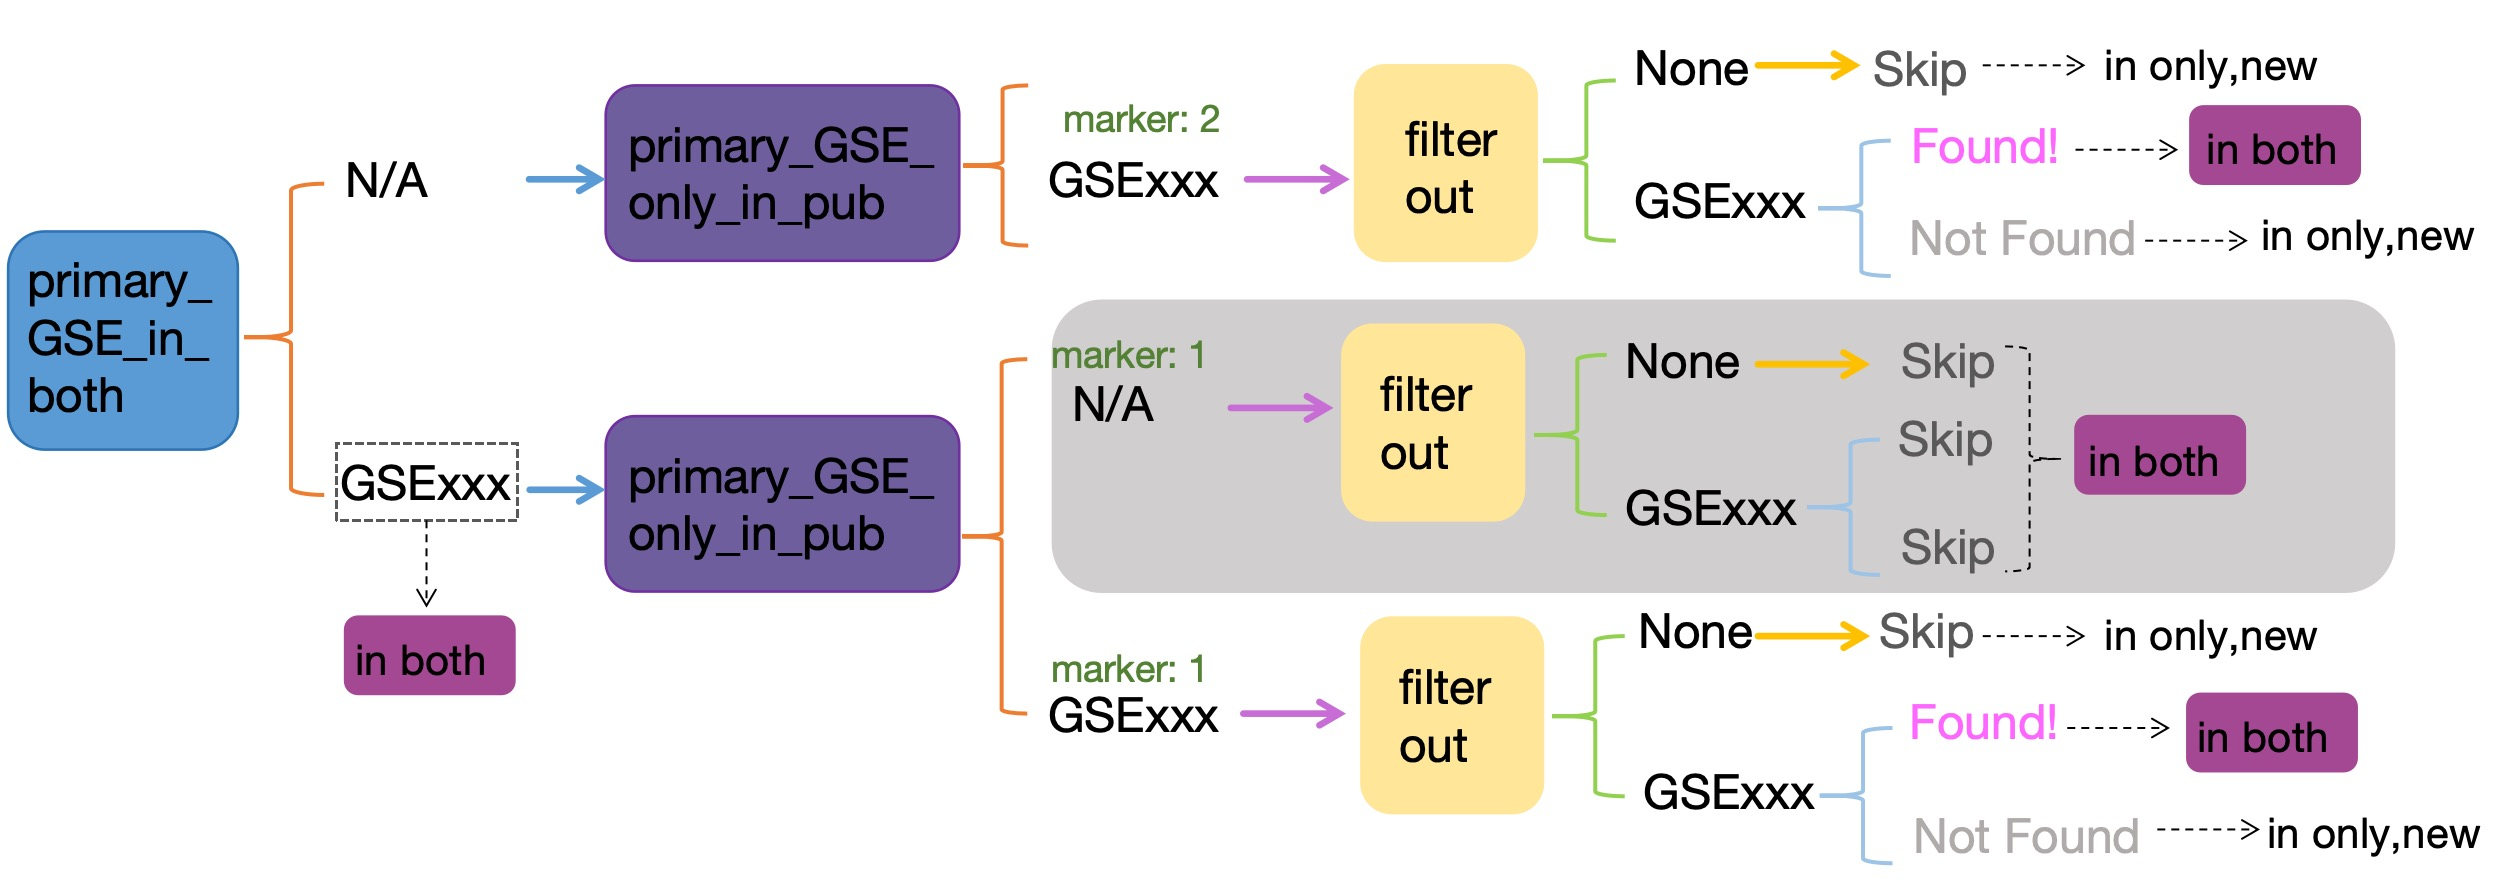

## First, let's deal with those GSE IDs that were mentioned only in publications - column: "primary_GSE_only_in_pub":


1. When "marker" equals to 2, and the column "GSE_only_in_pub_in_filtered_section" equals to either "Skip" or "Not Found":

In [ ]:
import pandas as pd
df = pd.read_csv("/content/finaly_datasheet_of_manual_check_GSE_IDs.csv")
mentioned_only_in_pub = df.loc[((df['Marker']==2)&(df['GSE_only_in_pub_in_filtered_section']=="Skip"))|((df['Marker']==2)&(df['GSE_only_in_pub_in_filtered_section']=="Not Found"))]

In [ ]:
print(len(mentioned_only_in_pub))

270


2. When "marker" equals to 1, column "primary_GSE_only_in_pub" is not "NaN", and then the column "GSE_only_in_pub_in_filtered_section" equals to either "Skip" or "Not Found":



In [ ]:
condition_picked_out = df.loc[df['primary_GSE_only_in_pub'].notna()]

In [ ]:
mentioned_only_in_pub1 = condition_picked_out.loc[((condition_picked_out['Marker']==1)&(condition_picked_out['GSE_only_in_pub_in_filtered_section']=="Skip"))|((condition_picked_out['Marker']==1)&(condition_picked_out['GSE_only_in_pub_in_filtered_section']=="Not Found"))]

In [ ]:
print(len(mentioned_only_in_pub1))

76


3. Let's drop redundant columns at first, we only want "preprint_doi, publication_doi, primary_GSE_only_in_pub" these three columns.

In [ ]:
mentioned_only_in_pub.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)

<ipython-input-54-d84f92882792>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_only_in_pub.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)


In [ ]:
mentioned_only_in_pub1.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)

<ipython-input-56-56b9abb952fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_only_in_pub1.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)


4. Let's concatenate them together:

In [ ]:
GSE_ID_only_in_pub = pd.concat([mentioned_only_in_pub, mentioned_only_in_pub1])

In [ ]:
GSE_ID_only_in_pub.to_csv("/content/manual_check_GSE_IDs_only_in_pub.csv")

## Secondly, let's deal with those GSE IDs that were mentioned in both preprints and publications; two columns are involved - "primary_GSE_in_both" and "primary_GSE_only_in_pub":

1. When "Marker" equals to 2, and the column "GSE_only_in_pub_in_filtered_section" equals to "Found!" (we only want to keep the "primary_GSE_only_in_pub" column in the later):

In [ ]:
import pandas as pd
df1 = pd.read_csv("/content/finaly_datasheet_of_manual_check_GSE_IDs.csv")
mentioned_in_both = df1.loc[((df1['Marker']==2)&(df1['GSE_only_in_pub_in_filtered_section']=="Found!"))]

In [ ]:
print(len(mentioned_in_both))

246


2. When "Marker" equals to 1, column "primary_GSE_only_in_pub" *is* "NaN"(we will drop the "primary_GSE_only_in_pub" and only keep "primary_GSE_in_both" in the later):

In [ ]:
condition_is_nan = df1.loc[df1['primary_GSE_only_in_pub'].isna()]

In [ ]:
print(len(condition_is_nan))

134


3. When "Marker" equals to 1, column "primary_GSE_only_in_pub" *is not* "NaN"; and then the column "GSE_only_in_pub_in_filtered_section" equals to "Found!"(we will keep both of the two columns: "primary_GSE_in_both; and "primary_GSE_only_in_pub"):

In [ ]:
condition_is_not_nan = df1.loc[df1['primary_GSE_only_in_pub'].notna()]

In [ ]:
mentioned_in_both1 = condition_is_not_nan.loc[((condition_is_not_nan['Marker']==1)&(condition_is_not_nan['GSE_only_in_pub_in_filtered_section']=="Found!"))]

In [ ]:
print(len(mentioned_in_both1))

159


4. Now, let's remove redundant columns:

(1). For the dataframe-"mentioned_in_both", we only want to keep "preprint_doi, publication_doi, primary_GSE_only_in_pub":

In [ ]:
mentioned_in_both.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)

<ipython-input-112-355aa5020c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_in_both.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_in_both','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)


In [ ]:
mentioned_in_both.head(10)

,preprint_doi,publication_doi,primary_GSE_only_in_pub
3,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600
5,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929
7,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660
8,10.1101/624957,10.1016/j.celrep.2019.08.089,GSE125523
9,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE120520
11,10.1101/457226,10.1016/j.celrep.2019.09.052,GSE120637
12,10.1101/543199,10.1016/j.celrep.2019.10.131,GSE124691
18,10.1101/801076,10.1016/j.celrep.2020.02.076,GSE143333
23,10.1101/2020.10.21.349159,10.1016/j.celrep.2021.109310,GSE157777
27,10.1101/2021.06.02.446799,10.1016/j.celrep.2021.109982,GSE137036


In [ ]:
# Rename the column "primary_GSE_only_in_pub":
mentioned_in_both.rename(columns={'primary_GSE_only_in_pub': 'primary_GSE_in_both'}, inplace=True)

<ipython-input-114-7e6c71b1da4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_in_both.rename(columns={'primary_GSE_only_in_pub': 'primary_GSE_in_both'}, inplace=True)


(2). For the dataframe-"condition_is_nan", we will only keep "preprint_doi, publication_doi, primary_GSE_in_both"

In [ ]:
condition_is_nan.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_only_in_pub','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)

<ipython-input-115-9c465166ae3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_is_nan.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','primary_GSE_only_in_pub','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)


In [ ]:
condition_is_nan.head(10)

,preprint_doi,publication_doi,primary_GSE_in_both
0,10.1101/2020.11.16.379412,10.1002/dvdy.303,GSE161386
1,10.1101/2020.10.22.349761,10.1002/jev2.12124,"GSE158624,GSE156572"
2,10.1101/2020.04.24.057802,10.1007/s00401-020-02226-7,"GSE137959,GSE137845,GSE134470,GSE128195"
14,10.1101/628214,10.1016/j.celrep.2019.11.065,GSE119201
15,10.1101/452342,10.1016/j.celrep.2019.11.077,GSE120854
19,10.1101/2020.02.25.964197,10.1016/j.celrep.2020.108473,GSE138072
22,10.1101/2020.08.07.241075,10.1016/j.celrep.2021.108735,GSE155136
35,10.1101/096230,10.1016/j.cmet.2016.11.016,GSE83619
55,10.1101/2020.06.18.20131326,10.1016/j.isci.2020.101947,GSE152641
74,10.1101/283077,10.1016/j.mex.2019.01.009,GSE111995


(3). For the dataframe-"mentioned_in_both1", we will keep "preprint_doi, publication_doi, primary_GSE_in_both, primary_GSE_only_in_pub"

In [ ]:
mentioned_in_both1.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)

<ipython-input-139-4507af277c2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_in_both1.drop(columns=['Unnamed: 0','accession_IDs_after_filtering','Primary accessions?','P_or_S','Marker','GSE_ID_before_filtering','filtered_out_GSE_IDs','GSE_only_in_pub_in_filtered_section'],inplace=True)


In [ ]:
mentioned_in_both1

,preprint_doi,publication_doi,primary_GSE_in_both,primary_GSE_only_in_pub
4,10.1101/283309,10.1016/j.ccell.2018.11.018,GSE108107,GSE108160
17,10.1101/579920,10.1016/j.celrep.2019.12.054,"GSE125918,GSE125919",GSE125817
38,10.1101/520536,10.1016/j.devcel.2021.12.005,GSE125434,GSE179549
40,10.1101/379198,10.1016/j.ebiom.2019.01.063,GSE117324,GSE115961
56,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,GSE154840,GSE159061
...,...,...,...,...
843,10.1101/2020.03.18.996975,10.1186/s13059-020-02210-0,GSE159929,GSE130973
844,10.1101/2020.03.18.996975,10.1186/s13059-020-02210-0,GSE159929,GSE147424
868,10.1101/2021.08.25.457731,10.3390/genes12091442,GSE121708,GSE154762
875,10.1101/574509,10.1016/j.celrep.2019.09.066,GSE124439,GSE122650


In [ ]:
mentioned_in_both1['primary_GSE_in_both'] = mentioned_in_both1['primary_GSE_in_both'].astype(str) + ',' + mentioned_in_both1['primary_GSE_only_in_pub'].astype(str)

<ipython-input-141-c6690f4822f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_in_both1['primary_GSE_in_both'] = mentioned_in_both1['primary_GSE_in_both'].astype(str) + ',' + mentioned_in_both1['primary_GSE_only_in_pub'].astype(str)


In [ ]:
# Drop column - "primary_GSE_only_in_pub"
mentioned_in_both1.drop(columns=['primary_GSE_only_in_pub'],inplace=True)

<ipython-input-142-0acac6655b8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mentioned_in_both1.drop(columns=['primary_GSE_only_in_pub'],inplace=True)


In [ ]:
mentioned_in_both1

,preprint_doi,publication_doi,primary_GSE_in_both
4,10.1101/283309,10.1016/j.ccell.2018.11.018,"GSE108107,GSE108160"
17,10.1101/579920,10.1016/j.celrep.2019.12.054,"GSE125918,GSE125919,GSE125817"
38,10.1101/520536,10.1016/j.devcel.2021.12.005,"GSE125434,GSE179549"
40,10.1101/379198,10.1016/j.ebiom.2019.01.063,"GSE117324,GSE115961"
56,10.1101/2020.11.06.370338,10.1016/j.isci.2021.102444,"GSE154840,GSE159061"
...,...,...,...
843,10.1101/2020.03.18.996975,10.1186/s13059-020-02210-0,"GSE159929,GSE130973"
844,10.1101/2020.03.18.996975,10.1186/s13059-020-02210-0,"GSE159929,GSE147424"
868,10.1101/2021.08.25.457731,10.3390/genes12091442,"GSE121708,GSE154762"
875,10.1101/574509,10.1016/j.celrep.2019.09.066,"GSE124439,GSE122650"


5. Let's concatenate these three dataframes together:

In [ ]:
GSE_ID_in_both = pd.concat([mentioned_in_both,condition_is_nan,mentioned_in_both1])

In [ ]:
print(len(GSE_ID_in_both))

539


In [ ]:
GSE_ID_in_both.to_csv("/content/manual_check_GSE_IDs_in_both.csv")

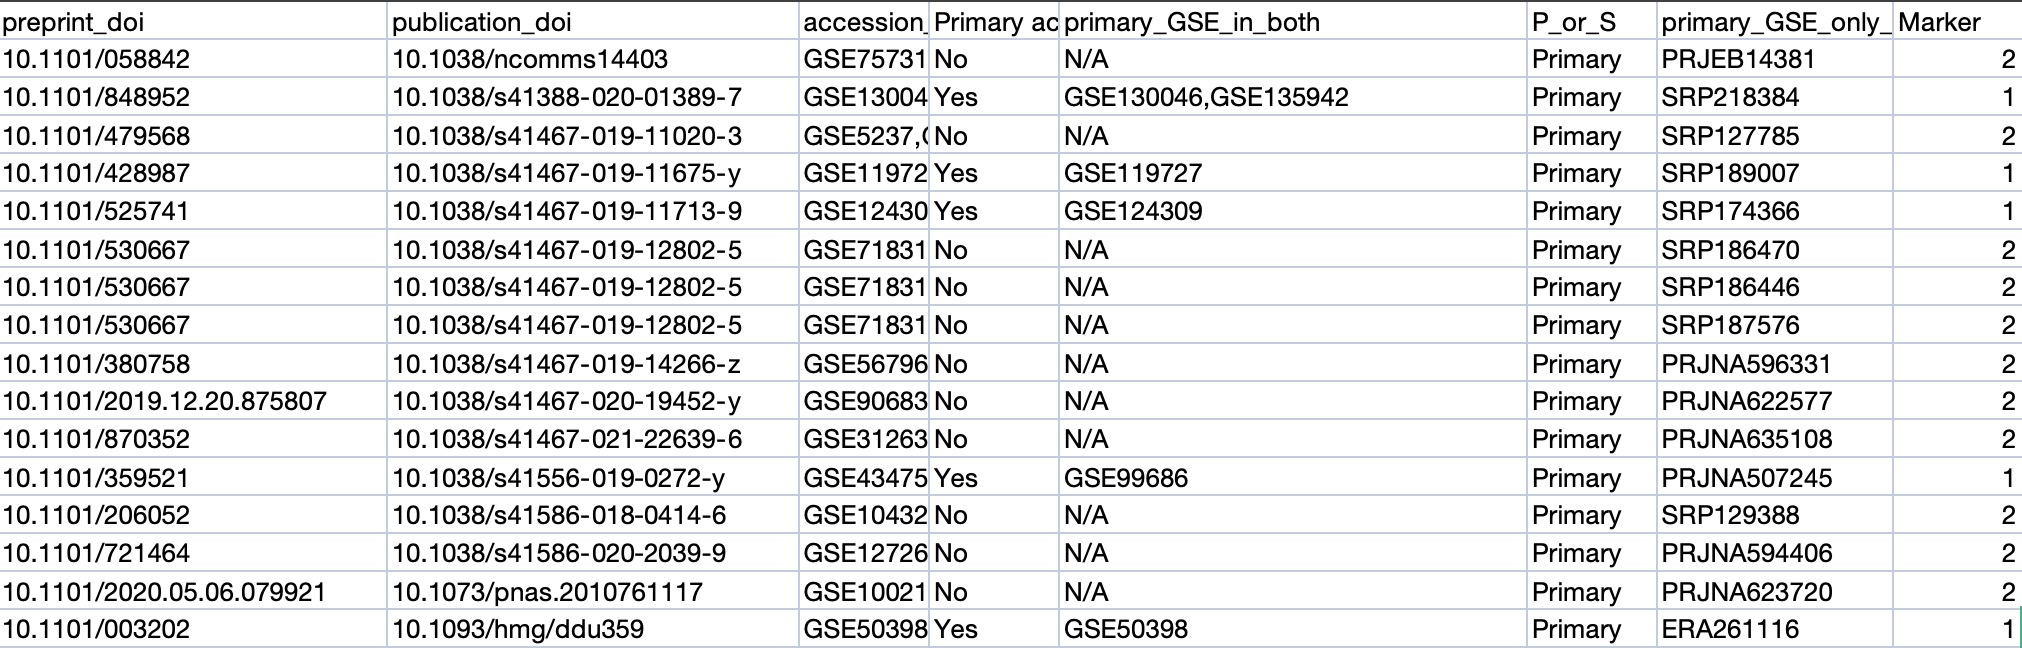

There are five more studies which mentioned GSE IDs in both preprint and publications; they are from "SRA_IDs_32.csv". Manually add them to the "manual_check_GSE_IDs_in_both.csv".

In the dataset, each cell contains multiple Gene Expression Omnibus (GEO) Series (GSE) IDs. We need to separate these GSE IDs so that each one is in a new row.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/manual_check_GSE_IDs_in_both.csv")
# Convert the comma-separated string to a list
df['primary_GSE_in_both'] = df['primary_GSE_in_both'].str.replace(' ','').str.split(',')

# Explode the list into separate rows
df = df.explode('primary_GSE_in_both')

print(len(df))

df

791


,preprint_doi,publication_doi,primary_GSE_in_both
0,10.1101/459289,10.1007/s13238-019-0650-z,GSE55600
1,10.1101/425348,10.1016/j.celrep.2019.03.108,GSE115929
2,10.1101/393876,10.1016/j.celrep.2019.07.084,GSE133660
3,10.1101/624957,10.1016/j.celrep.2019.08.089,GSE125523
4,10.1101/600932,10.1016/j.celrep.2019.09.017,GSE120520
...,...,...,...
539,10.1101/848952,10.1038/s41388-020-01389-7,GSE135942
540,10.1101/428987,10.1038/s41467-019-11675-y,GSE119727
541,10.1101/525741,10.1038/s41467-019-11713-9,GSE124309
542,10.1101/359521,10.1038/s41556-019-0272-y,GSE99686


Noticing that there are three rows with "nan" values:

Let's see what is happeing in the oringinal manual check datasheet:

https://docs.google.com/spreadsheets/d/1jYqC2jIS9PVh9aEK8AiDcNj-YoYYjjAjAWNtWB89foU/edit?usp=sharing

(1). "10.1101/2020.06.19.20054809" has a "NaN" value in the column "primary_GSE_in_both"; the reason is that "Raw sequencing  are deposited  at The European Genome-phenome Archive".

(2). "10.1101/331710" has a "NaN" value in the column "primary_GSE_in_both"; the reason is that "They upload their data to the Europe PubMed Central".

(3). "10.1101/020842" has a "NaN" value in the column "primary_GSE_in_both"; the reason is that they give the accession ID - SRP059458 in the publication, and this accession ID is added to the "SRA_IDs_32.csv".

Let's delete these three rows:

In [ ]:
df_dropped_3_nan = df.dropna()
print(len(df_dropped_3_nan))

788


In [ ]:
df_dropped_3_nan.to_csv("/content/manual_check_GSE_IDs_in_both_new.csv")